In [391]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso # tipi di regressione lineare con alcune differenze

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [392]:
df=pd.read_csv("../../prepared_ravdess_features.csv")

In [393]:
df_copy=df.copy()

In [394]:
le=preprocessing.LabelEncoder()
df_copy["vocal_channel"]=le.fit_transform(df_copy["vocal_channel"])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [395]:
matrix = df_copy.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)
matrix

,vocal_channel,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
vocal_channel,1.000000,0.021491,-0.724771,-0.133524,-0.036652,0.263475,-0.179433,0.256152,0.486255,0.125154,0.043150,0.112402,-0.221502,-0.535351,0.455390,-0.385434,0.190507,0.123545,-0.481279,-0.025346,-0.123588,0.021518,-0.026629,0.493606,-0.029126
frame_width,0.021491,1.000000,-0.011463,-0.039940,-0.058948,0.056270,-0.045810,0.025257,0.057208,0.063316,-0.038332,0.017673,-0.041743,-0.049037,0.025739,-0.015826,-0.007737,0.009463,-0.030879,0.000408,-0.034905,0.034752,-0.032584,0.024893,0.023266
length_ms,-0.724771,-0.011463,1.000000,0.331158,0.010239,-0.303271,0.206468,-0.346807,-0.544216,-0.179825,-0.078471,-0.115780,0.291239,0.620021,-0.560935,0.410205,-0.244967,-0.072681,0.601269,0.004942,0.168267,-0.072458,0.073623,-0.459834,0.067558
zero_crossings_sum,-0.133524,-0.039940,0.331158,1.000000,0.128609,-0.558561,0.500026,-0.448766,-0.071350,-0.372155,0.188889,-0.048420,0.180369,0.135859,-0.405588,0.114070,-0.193627,0.072318,0.444536,0.020661,0.469510,-0.421128,0.417950,-0.115347,0.206164
mfcc_mean,-0.036652,-0.058948,0.010239,0.128609,1.000000,-0.620039,0.607146,0.174947,-0.281320,-0.593648,0.399432,-0.375971,0.357755,0.252073,0.314997,-0.355717,0.199679,0.020872,-0.187512,0.006264,0.565355,-0.593372,0.584284,0.112754,0.054820
mfcc_std,0.263475,0.056270,-0.303271,-0.558561,-0.620039,1.000000,-0.976065,0.435928,0.369007,0.523885,-0.131814,0.226164,-0.452195,-0.472652,0.363959,-0.228324,0.280154,0.066374,-0.409975,-0.004166,-0.844735,0.817290,-0.811442,0.109008,-0.363239
mfcc_min,-0.179433,-0.045810,0.206468,0.500026,0.607146,-0.976065,1.000000,-0.394456,-0.284897,-0.452879,0.109527,-0.192931,0.366801,0.359394,-0.305133,0.222931,-0.275363,-0.074182,0.329905,-0.006041,0.842117,-0.829126,0.822666,-0.015526,0.394790
mfcc_max,0.256152,0.025257,-0.346807,-0.448766,0.174947,0.435928,-0.394456,1.000000,0.149154,0.206554,0.078000,0.000694,-0.245593,-0.307196,0.571912,-0.496349,0.383183,0.012013,-0.522865,0.008062,-0.381774,0.338164,-0.323396,0.231351,-0.091369
sc_mean,0.486255,0.057208,-0.544216,-0.071350,-0.281320,0.369007,-0.284897,0.149154,1.000000,0.529228,0.130662,0.413615,-0.627878,-0.823461,0.560631,-0.322087,0.178108,-0.009146,-0.635594,-0.002638,-0.219243,0.177645,-0.172195,0.281084,0.025767
sc_std,0.125154,0.063316,-0.179825,-0.372155,-0.593648,0.523885,-0.452879,0.206554,0.529228,1.000000,-0.445535,0.596108,-0.619472,-0.401400,0.083000,0.203008,-0.056684,-0.234175,-0.223286,-0.016338,-0.429530,0.426829,-0.408836,-0.002715,0.113132


In [396]:
# Normalizzazione delle variabili dipendente e indipendenti
df_normalized=df_copy.copy()
to_scale=["zero_crossings_sum","length_ms","vocal_channel","sc_skew","stft_skew"]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[to_scale])
df_normalized[to_scale] = scaled_features

In [397]:
df_train, df_test = train_test_split(df_normalized, test_size=0.3, random_state=100) 

In [398]:
x_train = df_train["zero_crossings_sum"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["zero_crossings_sum"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values

Linear Regression(X=zero_crossings_sum)

In [399]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [400]:
print('Coefficients: \n', reg.coef_) # slope -> inclinazione della linea
print('Intercept: \n', reg.intercept_) # il punto in cui la linea intercetta l'asse y

Coefficients: 
 [0.26513187]
Intercept: 
 0.0617320523837675


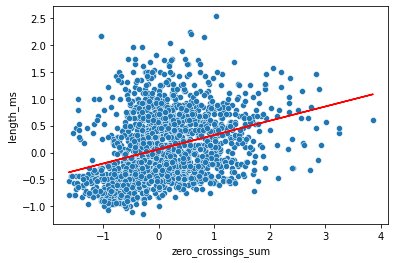

In [401]:
sns.scatterplot(data=df_train, x="zero_crossings_sum", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [402]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.108
MSE: 0.384
MAE: 0.512


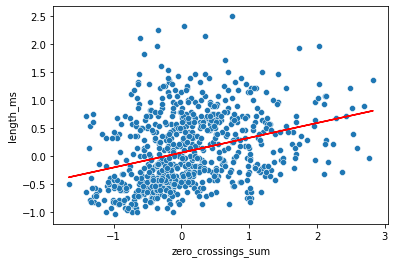

In [403]:
sns.scatterplot(data=df_test, x="zero_crossings_sum", y="length_ms")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

Ridge(X=zero_crossings_sum)

Coefficients: 
 [0.26488248]
Intercept: 
 0.06175770620851813
R2: 0.108
MSE: 0.384
MAE: 0.512


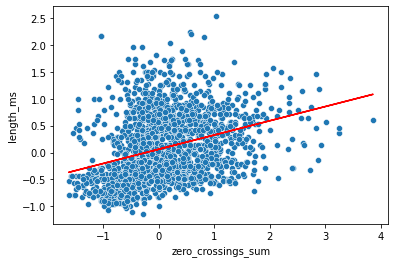

In [404]:
reg = Ridge()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="zero_crossings_sum", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Lasso(X=zero_crossings_sum)

Coefficients: 
 [0.]
Intercept: 
 0.08900502344570131
R2: -0.001
MSE: 0.431
MAE: 0.552


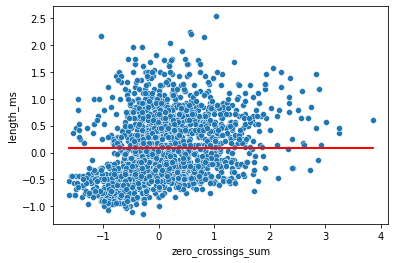

In [405]:
reg = Lasso()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="zero_crossings_sum", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Linear Regression (X=sc_skew)

In [406]:
x_train = df_train["sc_skew"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["sc_skew"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values

In [407]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [408]:
print('Coefficients: \n', reg.coef_) # slope -> inclinazione della linea
print('Intercept: \n', reg.intercept_) # il punto in cui la linea intercetta l'asse y

Coefficients: 
 [0.49156521]
Intercept: 
 0.08147327890429457


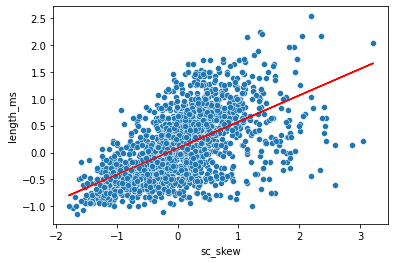

In [409]:
sns.scatterplot(data=df_train, x="sc_skew", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [410]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.435
MSE: 0.244
MAE: 0.388


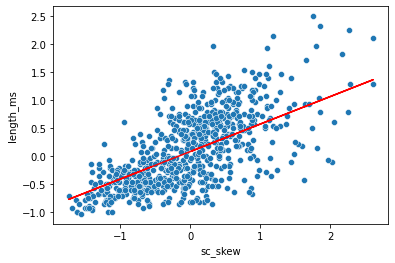

In [411]:
sns.scatterplot(data=df_test, x="sc_skew", y="length_ms")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

Ridge(X=sc_skew)

Coefficients: 
 [0.49107873]
Intercept: 
 0.08148073274983747
R2: 0.435
MSE: 0.244
MAE: 0.388


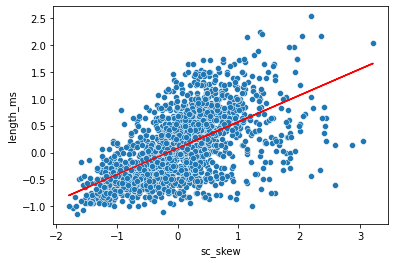

In [412]:
reg = Ridge()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Lasso(X=sc_skew)

Coefficients: 
 [0.]
Intercept: 
 0.08900502344570131
R2: -0.001
MSE: 0.431
MAE: 0.552


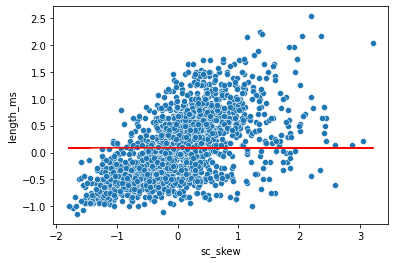

In [413]:
reg = Lasso()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Linear Regression (X=sc_mean)

In [414]:
x_train = df_train["sc_mean"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["sc_mean"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values

In [415]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [416]:
print('Coefficients: \n', reg.coef_) # slope -> inclinazione della linea
print('Intercept: \n', reg.intercept_) # il punto in cui la linea intercetta l'asse y

Coefficients: 
 [-0.00037724]
Intercept: 
 2.0375508778584748


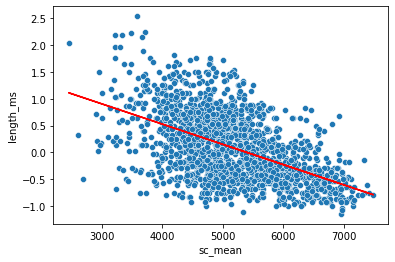

In [417]:
sns.scatterplot(data=df_train, x="sc_mean", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [418]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.338
MSE: 0.285
MAE: 0.433


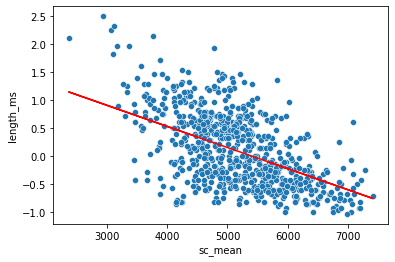

In [419]:
sns.scatterplot(data=df_test, x="sc_mean", y="length_ms")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

Ridge(X=sc_mean)

Coefficients: 
 [-0.00037724]
Intercept: 
 2.0375508763740906
R2: 0.338
MSE: 0.285
MAE: 0.433


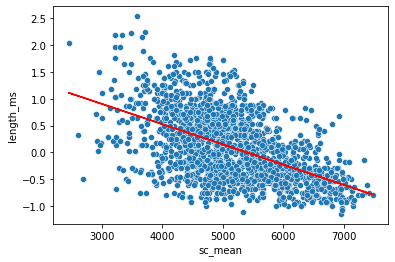

In [420]:
reg = Ridge()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_mean", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Lasso(X=sc_mean)

Coefficients: 
 [-0.00037595]
Intercept: 
 2.0308969660847285
R2: 0.338
MSE: 0.285
MAE: 0.433


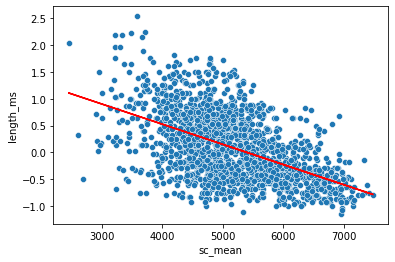

In [421]:
reg = Lasso()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_mean", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Linear Regression (X=vocal_channel)

In [422]:
x_train = df_train["vocal_channel"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["vocal_channel"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values

reg = LinearRegression() 
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_) # slope -> inclinazione della linea
print('Intercept: \n', reg.intercept_) # il punto in cui la linea intercetta l'asse y

Coefficients: 
 [-0.96056351]
Intercept: 
 -0.2643187513395817


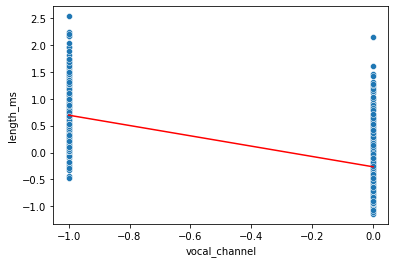

In [423]:
sns.scatterplot(data=df_train, x="vocal_channel", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

R2: 0.505
MSE: 0.213
MAE: 0.344


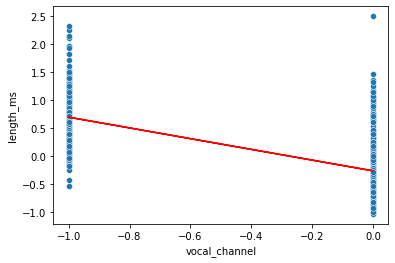

In [424]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x="vocal_channel", y="length_ms")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

Ridge(X=vocal_channel)

Coefficients: 
 [-0.95812683]
Intercept: 
 -0.26342246805633485
R2: 0.505
MSE: 0.213
MAE: 0.344


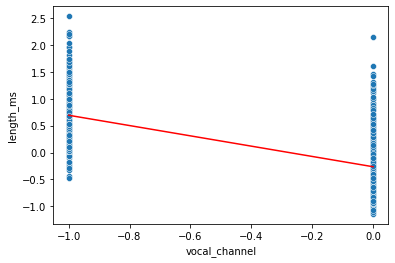

In [425]:
reg = Ridge()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="vocal_channel", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Lasso(X=vocal_channel)

Coefficients: 
 [-0.]
Intercept: 
 0.08900502344570131
R2: -0.001
MSE: 0.431
MAE: 0.552


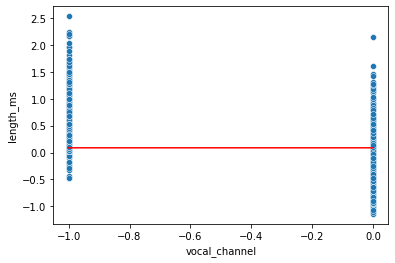

In [426]:
reg = Lasso()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="vocal_channel", y="length_ms")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

# KNN (X=sc_skew)

In [431]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold,KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


x_train = df_train["sc_skew"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["sc_skew"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values




param_grid = {
    "n_neighbors": np.arange(3, 30, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=param_grid,
    cv=KFold(), 
    n_jobs=-1,
    refit=True,
    scoring="r2"
)

grid.fit(x_train, y_train)
print(grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'uniform'} 0.368084798474546


R2: 0.431
MSE: 0.245
MAE: 0.378


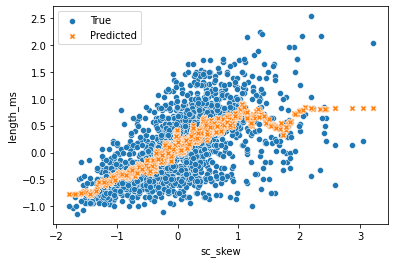

In [432]:

reg = KNeighborsRegressor(metric="euclidean",n_neighbors=27,weights="uniform")
reg.fit(x_train,y_train)



y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_train, x="sc_skew", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# DECISION TREE(X=sc_skew)

In [442]:
from sklearn.tree import DecisionTreeRegressor

x_train = df_train["sc_skew"].values.reshape(-1, 1)
y_train = df_train["length_ms"].values

x_test = df_test["sc_skew"].values.reshape(-1, 1)
y_test = df_test["length_ms"].values

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["squared_error", "absolute_error"] 
                }


grid = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid=check_params,
    cv=KFold(), 
    refit=True,
    scoring="r2"
)

grid.fit(x_train, y_train)
print(grid.best_params_, grid.best_score_)

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2} 0.35556914961019925


R2: 0.410
MSE: 0.254
MAE: 0.384


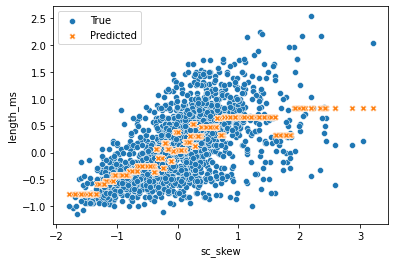

In [445]:
reg = DecisionTreeRegressor(criterion="squared_error",max_depth=5,min_samples_leaf=20,min_samples_split=2)
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_train, x="sc_skew", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()